## AirBnb Listing Analysis

### Data Prep & Analysis
##### 1. Import/Open the Listings.csv file
##### 2. Cast any date columns as a datetime format
##### 3. Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
##### 4. QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field



In [5]:
import pandas as pd
listings = pd.read_csv(
    "Listings.csv" ,
    encoding="ISO-8859-1",
    low_memory=False,
    parse_dates=["host_since"]
)

In [6]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [8]:
#listings["host_since"] = pd.to_datetime(listings["host_since"])
#listings.info()

In [9]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:,["host_since", "neighbourhood", "city", "accommodates", "price" ]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [10]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [11]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [12]:
paris_listings.query("price == 0" and"accommodates == 0")#.count()

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
203261,2020-07-15,Batignolles-Monceau,Paris,0,0
203263,2016-06-07,Palais-Bourbon,Paris,0,0
203264,2020-09-08,Pantheon,Paris,0,0
203265,2020-09-21,Vaugirard,Paris,0,0
203267,2020-10-29,Observatoire,Paris,0,0


### Data prep for Visualization
##### 1. Created table paris_listings_neighbourhood, that groups paris listings by 'neighbourhood' & calculates the mean price for each neighbourhood sorted from lowest to highest average price.
##### 2. Created table paris_listings_accommodations, filered down to most expensive neighbourhood and contain mean price for each value of 'accommodates' sorted from lowest to highest average price
##### 3. Created table paris_listing_over_time, which is grouped by year of 'host_since' column. calculated count of  rows, representing total no. of new hosts , and the average price of each year. 

In [13]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [19]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'" )
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")
)
paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [15]:
paris_listings_over_time =(
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood" : "count",
        "price" : "mean"
    })   
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## Visualize the data and summarize findings
##### Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
##### Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed
##### Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
##### Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?


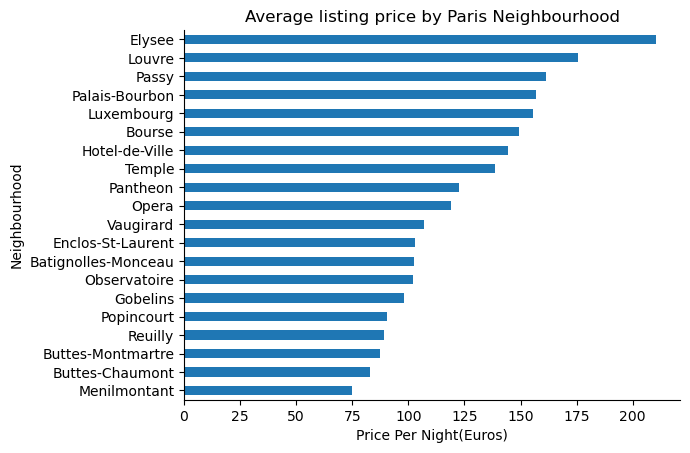

In [16]:
import seaborn as sns

(paris_listings_neighbourhood 
    .plot
    .barh(
        title="Average listing price by Paris Neighbourhood",
        xlabel="Price Per Night(Euros)",
        ylabel="Neighbourhood",
        legend=None
    )
)
sns.despine()

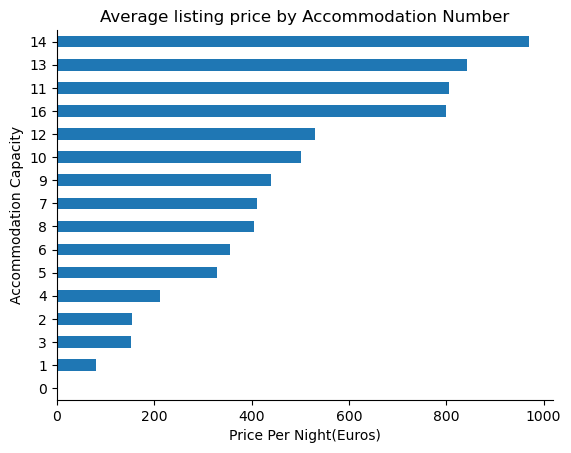

In [20]:
(paris_listings_accommodates 
    .plot
    .barh(
        title="Average listing price by Accommodation Number",
        xlabel="Price Per Night(Euros)",
        ylabel="Accommodation Capacity",
        legend=None
    )
)
sns.despine()

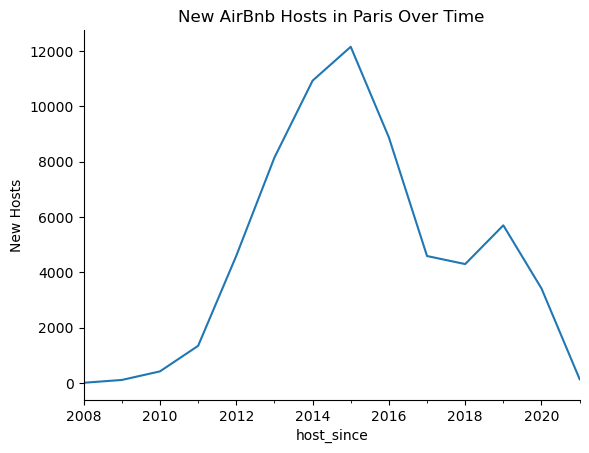

In [22]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)
sns.despine()

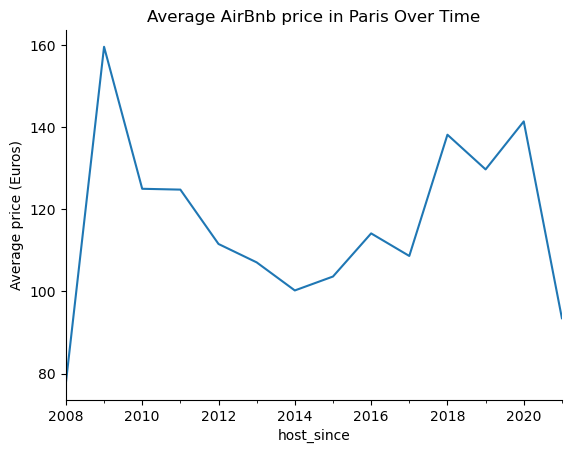

In [24]:
paris_listings_over_time["price"].plot(
    ylabel="Average price (Euros)",
    title="Average AirBnb price in Paris Over Time"
)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

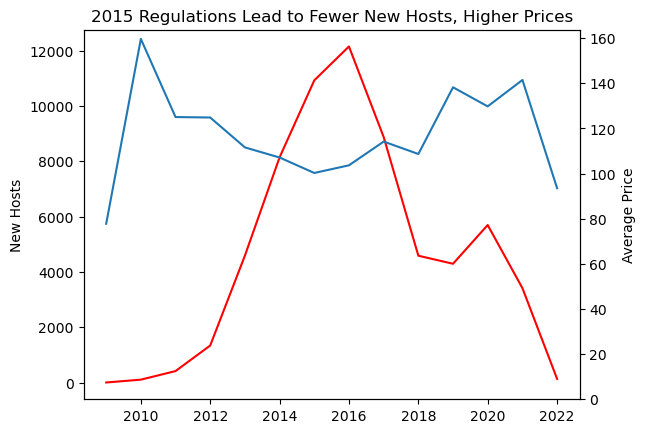

In [33]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="red"
)
ax.set_ylabel("New Hosts")
ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")
